In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the data

df = pd.read_csv('Vehicle_insurance_encoded.csv')
df.head()

,AccidentArea,Sex,Age,Fault,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,...,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,0,1,21,0,5.0,0,12,300,1,4.0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,34,0,5.0,0,15,400,4,4.0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,47,0,5.0,0,7,400,3,4.0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,65,1,1.0,0,4,400,2,4.0,...,0,1,0,0,0,1,0,1,0,0
4,0,1,27,1,5.0,0,3,400,1,4.0,...,0,1,0,0,1,0,0,0,1,0


In [4]:
df.shape

(15420, 62)

### Generating data

1. Generating data
2. Combine with the original data set
3. Apply MPT

In [21]:
import numpy as np
from scipy.stats import gamma

# Set the parameters
# Set mean as 4000 (GBP)
mean = 4000
shape = 2
scale = mean / shape
size = 15420

# Generate the samples
samples = gamma.rvs(a=shape, scale=scale, size=size)
samples = np.round(samples).astype(int)

print(samples[:10])

[3407 7193 6656 7545 6597 8229 3665 5084 2176 1567]


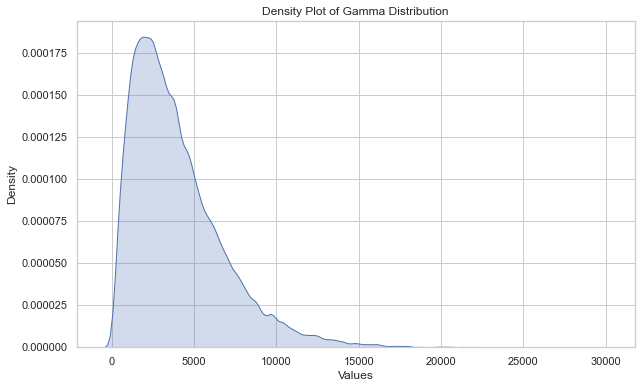

In [22]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(samples, bw_adjust=0.5, fill=True)
plt.title('Density Plot of Gamma Distribution')
plt.xlabel('Values')
plt.ylabel('Density')

plt.show()

In [23]:
np.random.seed(42)

np.random.shuffle(samples)

df['Claim_values'] = samples

In [24]:
df['Claim_values'].head()

0    3928
1    5066
2    5123
3    1382
4    4639
Name: Claim_values, dtype: int64

In [25]:
df.to_csv('with_claim_values.csv', index=False)